# Section 20. The Euler method

from Chapter 2. Numerical Differentail Equation Methods in Butcher "Numerical methods for ordinary differential equations," 2nd ed., Wiley, 2008.

掲載されている図をできるだけ単純に作ってみたい．

$$
\newcommand{\bv}[1]{\pmb{#1}}
\newcommand{\df}[2]{\frac{d #1}{d #2}}
\newcommand{\pf}[2]{\frac{\partial #1}{\partial #2}}
%
\newcommand{\pr}[1]{\!\left( #1 \right)}
%
\newcommand{\pmat}[1]{\begin{pmatrix} #1 \end{pmatrix}} % \pmat{1 & 2 \\ 3 & 4}
\newcommand{\mat}[1]{\left( \begin{matrix} #1 \end{matrix} \right)}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## §200. Introduction to the Euler methods

#### 定義
常微分方程式の初期値問題は一般に次のような形で表される:
$$
\bv{y}'(x) = \bv{f}\pr{x, \bv{y}(x)}, \quad \bv{y}(x_0) = \bv{y}_0.
$$
ただし，$x \in [x_0, \bar{x}]$ は独立変数(例えば時刻)で, $\bv{y} \in \mathbb{R}^M$ は従属変数(一般にベクトル)とする．
また，関数 $\bv{f}: [x_0, \bar{x}]\times \mathbb{R}^M \rightarrow \mathbb{R}^M$とする．

Euler methodは，この初期値問題を次のようにして計算する方法である:
$$
\bv{y} (x_{k}) = \bv{y} (x_0) + (x_{k} - x_{k-1}) \bv{y}' (x_{k-1}).
$$
ただし$k = 1, 2, \ldots, N$．

#### 例
$$
y'(x) = \frac{y-2xy^2}{1+x}, \quad y(0) = \frac{2}{5}
$$
をconstant stepsize $h$のEuler methodで計算してみたのが次のブロック．


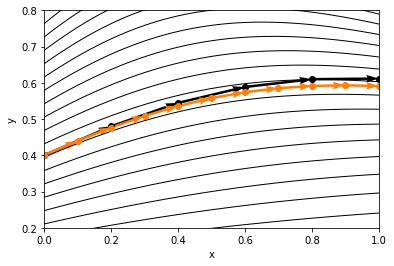

In [2]:
def euler_test1(h=0.2):
    x = np.arange(0.0, 1.1, h)
    y = np.zeros_like(x)
    y[0] = 0.4
    for k in range(1, len(x)):
        dydx = (y[k-1] - 2*x[k-1]*y[k-1]**2) / (1.+x[k-1])
        y[k] = y[k-1] + dydx*(x[k]-x[k-1])
    return x, y

x1, y1 = euler_test1(h=0.2)
x2, y2 = euler_test1(h=0.1)

x_true = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
for y0 in np.linspace(0.1, 0.8, 20):
    C = 1./y0
    y_true = (1.+x_true) / (C+x_true**2)
    ax.plot(x_true, y_true, 'k-', lw=1)
    
ax.plot(x1, y1, 'ko', lw=2)
ax.quiver(x1[:-1], y1[:-1], np.diff(x1), np.diff(y1), scale_units='xy', angles='xy', scale=1)

ax.plot(x2, y2, 'o', c='C1', lw=2)
ax.quiver(x2[:-1], y2[:-1], np.diff(x2), np.diff(y2), scale_units='xy', angles='xy', scale=1, color='C1')

ax.set_xlim(0, 1)
ax.set_xlabel('x')
ax.set_ylim(0.2, 0.8)
ax.set_ylabel('y')
plt.show()

$h=0.2$の場合(黒線)より，$h=0.1$の場合(オレンジ色の線)の方が，細い黒線で示した厳密解
$$
y(x) = \frac{1+x}{C+x^2}
$$
($C$は定数)に近づくのが見てわかる．

> [厳密解の確認]
> $$
\begin{align*}
y'(x) &= \frac{(C+x^2) - (1+x)\cdot 2x}{(C+x^2)^2}
= \frac{1}{(C+x^2)} - \frac{2x(1+x)}{(C+x^2)^2}
= \frac{1+x}{(1+x)(C+x^2)} - \frac{2x(1+x)^2}{(C+x^2)(1+x)} \\
&= \frac{y - 2xy^2}{1+x}
\end{align*}
$$

※ $y(0) = \frac{1+0}{C+0} = \frac{1}{C}$なので，厳密解のプロットでは，$y(0)$をいくつか適当に選んで，そこから$C$を決めてる．

## §201. Some numerical experiments

数値実験の例を示していく節．

#### 例1
$$
y'(x) = \frac{y+x}{y-x}, \quad y(0) = 1
$$

厳密解は
$$
y(x) = x + \sqrt{1 + 2x^2}
$$
> [厳密解の確認]
> $$
\renewcommand{reprA}{\sqrt{1+2x^2}}
y'(x) = 1 + \frac{1}{2} \frac{4x}{\reprA} = \frac{\reprA + 2x}{\reprA} = \frac{(\reprA+x) +x}{(\reprA+x)-x} = \frac{y+x}{y-x}
$$


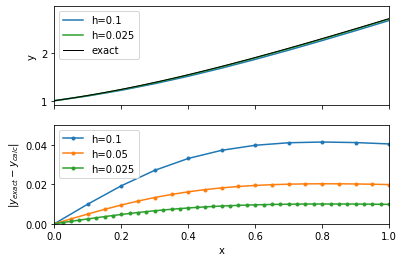

In [3]:
def euler_test2(h=0.1):
    x = np.arange(0.0, 1.1, h)
    y = np.zeros_like(x)
    y[0] = 1.0
    for k in range(1, len(x)):
        dydx = (y[k-1] + x[k-1]) / (y[k-1] - x[k-1])
        y[k] = y[k-1] + dydx*(x[k]-x[k-1])
    return x, y

x1, y1 = euler_test2(h=0.1)
x2, y2 = euler_test2(h=0.05)
x3, y3 = euler_test2(h=0.025)

y_true = lambda x_true: x_true + np.sqrt(1.+2.*x_true**2)

fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)
# ax.plot(x2, y2, '.-')
ax1.plot(x1, y1, '-', c='C0', label="h=0.1")
ax1.plot(x3, y3, '-', c='C2', label="h=0.025")
ax1.plot(x3, y_true(x3), 'k-', lw=1, label='exact')

ax1.legend()
ax1.set_xlim(0, 1)
ax1.set_ylabel('y')

ax2.plot(x1, y_true(x1)-y1, '.-', c='C0', label='h=0.1')
ax2.plot(x2, y_true(x2)-y2, '.-', c='C1', label='h=0.05')
ax2.plot(x3, y_true(x3)-y3, '.-', c='C2', label='h=0.025')

ax2.legend()
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 0.05)
ax2.set_ylabel(r'$\left| y_{exact} - y_{calc} \right|$')
ax2.set_xlabel('x')
plt.show()

上図の下段をみると，stepsizeを小さくすれば，厳密解と数値解の差(error)が小さくなっていくことが確認できる．
このstepsizeと，$x=1$におけるerrorの関係をプロットしたのが次の図．

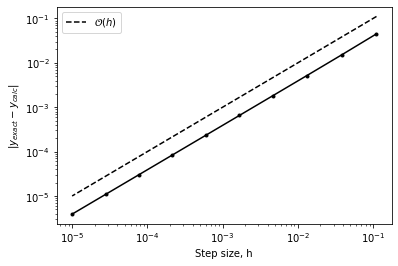

In [4]:
def euler_test3(n=10):
    x = np.linspace(0.0, 1.0, n)
    h = x[1]-x[0]
    
    y = np.zeros_like(x)
    y[0] = 1.0
    for k in range(1, len(x)):
        dydx = (y[k-1] + x[k-1]) / (y[k-1] - x[k-1])
        y[k] = y[k-1] + dydx*(x[k]-x[k-1])
    return x, y, h

y_exact = lambda x: x + np.sqrt(1+2*x**2)
x1 = 1.0
y1 = y_exact(x1)
hs = list()
es = list()
for a in np.linspace(1, 5, 10):
    n = int(10.**a)
    x, y, h = euler_test3(n)
    ix = np.argmin(np.abs(x - x1))
    e = y1 - y[ix]
    hs.append(h)
    es.append(e)

hs, es = np.array(hs), np.array(es)
fig, ax = plt.subplots()
ax.loglog(hs, es, 'k.-')
ax.loglog(hs, hs, 'k--', label=r'$\mathcal{O}(h)$')

ax.legend()
ax.set_xlabel('Step size, h')
ax.set_ylabel(r'$\left| y_{exact} - y_{calc} \right|$')
plt.show()

破線は，$O(h)$の傾きを示す線．Stepsizeを半分にすると誤差も半分になっている．

#### 例2

無次元化した，太陽と惑星の運動方程式(導出などは後々追加したい)：
$$
\renewcommand{reprA}{(y_1^2 + y_2^2)^\frac{3}{2}}
\begin{align*}
\df{y_1}{x} &= y_3 \\
\df{y_2}{x} &= y_4 \\
\df{y_3}{x} &= - \frac{y_1}{\reprA} \\
\df{y_4}{x} &= - \frac{y_2}{\reprA} 
\end{align*}
$$

$y_1, y_2$が太陽を中心とした直交座標系での惑星の位置．$y_3, y_4$がそれぞれ$y_1, y_2$方向の速度だというのを表すのが上の2本の式．下の2本の式は，速度の微分(加速度)と引力の関係を表す運動方程式．ただし太陽への惑星の影響は無視できるほど太陽が重いと仮定している．


離心率を$e$として，初期値を
$$
\bv{y}(0) = \pmat{1-e \\ 0 \\ 0 \\ \sqrt{\frac{1+e}{1-e}} }
$$
とするとき，$x=\pi$における厳密解
$$
\bv{y}(\pi) = \pmat{-1-e \\ 0 \\ 0 \\ \sqrt{-\frac{1-e}{1+e}} }
$$
とのerrorを，stepsize $h = \frac{1}{n}$ ($n$はステップ数) を変えてプロットしたのが次の図．

離心率$e=0$のときに円軌道，$0<e<1$のときに楕円軌道となる．$e=\frac{1}{2}$の方が，$e=\frac{3}{4}$より円軌道に近い．

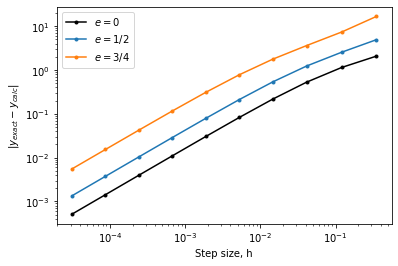

In [5]:
def euler_test4(e, n=200):
    x = np.linspace(0, np.pi, n)
    y = np.zeros(shape=(len(x), 4))
    y[0,:] = np.array([
        1.-e, 
        0., 
        0., 
        np.sqrt((1.+e)/(1.-e))
    ])
    for k in range(1, len(x)):
        C = (y[k-1,0]**2 + y[k-1,1]**2)**(-3./2.)
        dydx = np.array([
             y[k-1,2],
             y[k-1,3],
            -y[k-1,0]*C,
            -y[k-1,1]*C
        ])
        y[k,:] = y[k-1,:] + dydx[:]*(x[k]-x[k-1])
        
    h = x[1]-x[0]
    return x, y, h

def y_exact(e):
    return np.array([
        -1.-e,
        0.,
        0.,
        -np.sqrt((1.-e)/(1.+e))
    ])

def test1(e):
    ye = y_exact(e)
    hs, errors = [], []
    for a in np.linspace(1, 5, 10):
        n = int(10.**a)
        x, y, h = euler_test4(e, n)
#         print(e, n, h, x[-1], y[-1,:])
        error = np.linalg.norm(ye[:] - y[-1,:])
        hs.append(h)
        errors.append(error)
    return np.array(hs), np.array(errors)

hs0, errors0 = test1(e=0.)
hs1, errors1 = test1(e=1./2.)
hs2, errors2 = test1(e=3./4.)

fig, ax = plt.subplots()
ax.loglog(hs0, errors0, 'k.-', label=r'$e = 0$')
ax.loglog(hs1, errors1, '.-', label=r'$e = 1/2$')
ax.loglog(hs2, errors2, '.-', label=r'$e = 3/4$')

ax.legend()
ax.set_xlabel('Step size, h')
ax.set_ylabel(r'$\left| y_{exact} - y_{calc} \right|$')
plt.show()